In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import sklearn.metrics as metrics


In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.rename(columns=lambda x: x.replace('.', '_'), inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [7]:
df['convert'] = df['y']

In [8]:
df['convert'].replace(to_replace='no', value=0, inplace = True)
df['convert'].replace(to_replace='yes', value=1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [10]:
df[df['y']=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,convert
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [12]:
df.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,convert
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [13]:
df.corr().to_excel('corr_data2.xlsx', sheet_name = 'correlations', index = True)


In [14]:
df[(df['convert']==1)].to_excel('converts.xlsx', sheet_name='converts', index=False)

In [15]:
df[(df['convert']==0)].to_excel('nonconverts.xlsx', sheet_name='nonconverts', index=False)

## Identify the predictors

In [16]:
## Statsmodels logit

In [17]:
import statsmodels.formula.api as sm

In [18]:
# target feature
y = df['convert']

# predictor features
X1 = df[['pdays', 'previous', 'emp_var_rate', 'cons_price_idx','euribor3m', 'nr_employed']]

X2 = df[['pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx','euribor3m', 'campaign', 'nr_employed']]


In [19]:
# checks
import statsmodels.formula.api as sm

logistic1 = sm.logit(formula='convert~pdays+previous+emp_var_rate+cons_price_idx+euribor3m+nr_employed', data=df)
#pdays+

fitted1 = logistic1.fit()
fitted1.summary()

Optimization terminated successfully.
         Current function value: 0.287866
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                convert   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41181
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.1823
Time:                        14:40:14   Log-Likelihood:                -11857.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.6867     10.552      1.960      0.050       0.005      41.369
pdays             -0.0019   7.74e-05    -24.298      0.000      -0.002      -0.002
previous          -0.2699      0.034     -7.824      0.000      -0.338      -0.202
emp_var_rate      -0.5404      0.058     -9.261      0.000      -0.655      -0.426
cons_price_idx     0.3421      0.074      4.599      0.000       0.196       0.488
euribor3m          0.3418      0.045      7.520      0.000       0.253       0.431
nr_employed       -0.0105      0.001    -12.368      0.000      -0.012      -0.009
==================================================================================
"""

In [20]:
# results
results = fitted1.params
print("results : ", results)

# confusion matrix
cfm = fitted1.pred_table()
cfm_df = pd.DataFrame(cfm,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("\nConfusion matrix :\n", cfm_df)

# Sensitivity
numerator = cfm_df.iloc[1,1]              # TP
denominator = cfm_df.iloc[1,0] + cfm_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("\nSensitivity for fitted 1 : ", sensitivity)

# Specificity
numerator = cfm_df.iloc[0,0]              # TN
denominator = cfm_df.iloc[0,1] + cfm_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity for fitted 1 : ", specificity)


# probabilities of the predicted outputs being equal to one
X = df[['pdays','previous','emp_var_rate','cons_price_idx','euribor3m','nr_employed']]

class_1_pp = fitted1.predict(X)

# For class 1, find the area under the curve
# Find fpr, tpr
#preds_SVC = pred_test_probability_df.iloc[:,1]
fpr, tpr, _ = metrics.roc_curve(y, class_1_pp)

# Find auc
roc_auc_11 = metrics.auc(fpr, tpr)



results :  Intercept         20.686653
pdays             -0.001880
previous          -0.269908
emp_var_rate      -0.540441
cons_price_idx     0.342112
euribor3m          0.341777
nr_employed       -0.010544
dtype: float64

Confusion matrix :
         predicted_No  predicted_Yes
is_No        36186.0          362.0
is_Yes        3781.0          859.0

Sensitivity for fitted 1 :  0.18512931034482757
Specificity for fitted 1 :  0.9900952172485499


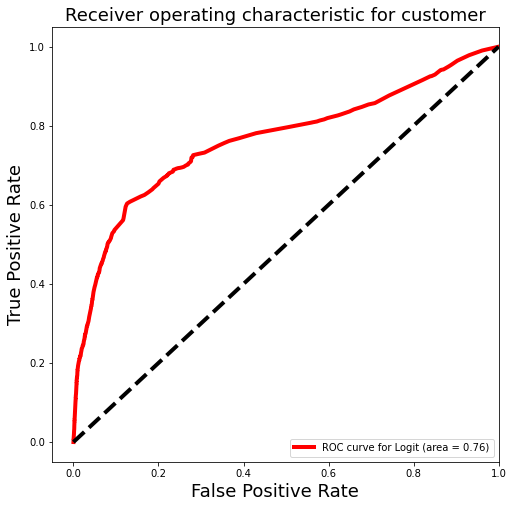

In [21]:
# Plot of a ROC curve for class 1 
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='red', lw = 4, label = 'ROC curve for Logit (area = %0.2f)' % roc_auc_11)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [22]:
logistic2 = sm.logit(formula='convert~pdays+previous+emp_var_rate+euribor3m+cons_price_idx+nr_employed+campaign', data=df)
#pdays+euribor3m++cons_conf_idx

fitted2 = logistic2.fit()
fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.287544
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                convert   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41180
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.1832
Time:                        14:40:14   Log-Likelihood:                -11843.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.8169     10.574      1.780      0.075      -1.907      39.541
pdays             -0.0019   7.74e-05    -24.285      0.000      -0.002      -0.002
previous          -0.2726      0.035     -7.902      0.000      -0.340      -0.205
emp_var_rate      -0.5276      0.058     -9.026      0.000      -0.642      -0.413
euribor3m          0.3250      0.046      7.134      0.000       0.236       0.414
cons_price_idx     0.3492      0.075      4.686      0.000       0.203       0.495
nr_employed       -0.0103      0.001    -12.025      0.000      -0.012      -0.009
campaign          -0.0453      0.009     -4.862      0.000      -0.063      -0.027
==================================================================================
"""

results :  Intercept         18.816876
pdays             -0.001879
previous          -0.272632
emp_var_rate      -0.527593
euribor3m          0.324952
cons_price_idx     0.349193
nr_employed       -0.010278
campaign          -0.045253
dtype: float64

Confusion matrix :
         predicted_No  predicted_Yes
is_No        36187.0          361.0
is_Yes        3786.0          854.0

Sensitivity for fitted 2 :  0.18405172413793103
Specificity for fitted 2 :  0.9901225785268688


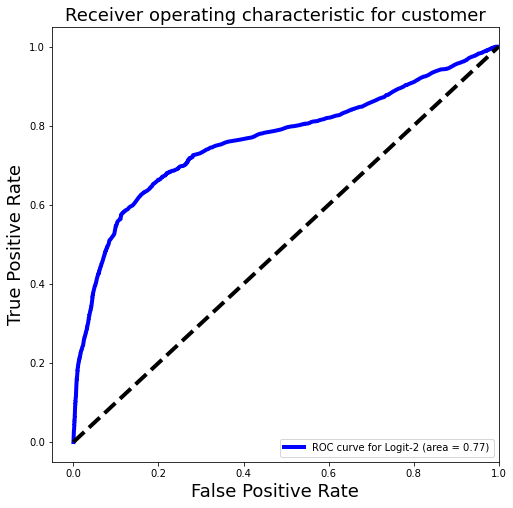

In [23]:
# results
results = fitted2.params
print("results : ", results)

# confusion matrix
cfm = fitted2.pred_table()
cfm_df = pd.DataFrame(cfm,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("\nConfusion matrix :\n", cfm_df)


# Sensitivity
numerator = cfm_df.iloc[1,1]              # TP
denominator = cfm_df.iloc[1,0] + cfm_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("\nSensitivity for fitted 2 : ", sensitivity)

# Specificity
numerator = cfm_df.iloc[0,0]              # TN
denominator = cfm_df.iloc[0,1] + cfm_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity for fitted 2 : ", specificity)



# probabilities of the predicted outputs being equal to one
X_2 = df[['pdays','previous','emp_var_rate','cons_price_idx','euribor3m','nr_employed', 'campaign']]

class_1_pp = fitted2.predict(X_2)
#results_prediction = (fitted2.predict(X_2) >= 0.5).astype(int)


# For class 1, find the area under the curve
# Find fpr, tpr
#preds_SVC = pred_test_probability_df.iloc[:,1]
fpr_2, tpr_2, _ = metrics.roc_curve(y, class_1_pp)

# Find auc
roc_auc_12 = metrics.auc(fpr_2, tpr_2)


# Plot of a ROC curve for class 1 
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr_2, tpr_2, color='blue', lw = 4, label = 'ROC curve for Logit-2 (area = %0.2f)' % roc_auc_12)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()



In [24]:
logistic3 = sm.logit(formula='convert~pdays+previous+emp_var_rate+euribor3m+cons_price_idx+nr_employed+campaign+cons_conf_idx', data=df)
#pdays+euribor3m++cons_conf_idx

fitted3 = logistic3.fit()
fitted3.summary()

Optimization terminated successfully.
         Current function value: 0.287291
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                convert   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41179
Method:                           MLE   Df Model:                            8
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.1839
Time:                        14:40:15   Log-Likelihood:                -11833.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -19.8416     13.329     -1.489      0.137     -45.967       6.283
pdays             -0.0018   7.78e-05    -23.760      0.000      -0.002      -0.002
previous          -0.2672      0.035     -7.741      0.000      -0.335      -0.200
emp_var_rate      -0.4811      0.059     -8.159      0.000      -0.597      -0.366
euribor3m          0.0595      0.074      0.803      0.422      -0.086       0.205
cons_price_idx     0.5470      0.085      6.464      0.000       0.381       0.713
nr_employed       -0.0060      0.001     -4.794      0.000      -0.008      -0.004
campaign          -0.0470      0.009     -5.043      0.000      -0.065      -0.029
cons_conf_idx      0.0236      0.005      4.569      0.000       0.013       0.034
==================================================================================
"""

results :  Intercept        -19.841606
pdays             -0.001848
previous          -0.267195
emp_var_rate      -0.481132
euribor3m          0.059483
cons_price_idx     0.546980
nr_employed       -0.006013
campaign          -0.046976
cons_conf_idx      0.023551
dtype: float64

Confusion matrix :
         predicted_No  predicted_Yes
is_No        36187.0          361.0
is_Yes        3781.0          859.0

Sensitivity for fitted 3 :  0.18512931034482757
Specificity for fitted 3 :  0.9901225785268688


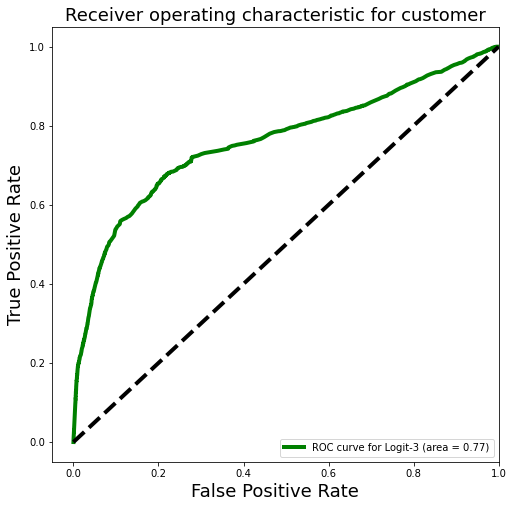

In [25]:
# results
results = fitted3.params
print("results : ", results)

# confusion matrix
cfm = fitted3.pred_table()
cfm_df = pd.DataFrame(cfm,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("\nConfusion matrix :\n", cfm_df)

# Sensitivity
numerator = cfm_df.iloc[1,1]              # TP
denominator = cfm_df.iloc[1,0] + cfm_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("\nSensitivity for fitted 3 : ", sensitivity)

# Specificity
numerator = cfm_df.iloc[0,0]              # TN
denominator = cfm_df.iloc[0,1] + cfm_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity for fitted 3 : ", specificity)


# probabilities of the predicted outputs being equal to one
X_3 = df[['pdays','previous','emp_var_rate','cons_price_idx','euribor3m','nr_employed', 'campaign', 'cons_conf_idx']]

class_1_pp = fitted3.predict(X_3)
results_prediction = (fitted2.predict(X_3) >= 0.5).astype(int)


# For class 1, find the area under the curve
# Find fpr, tpr
#preds_SVC = pred_test_probability_df.iloc[:,1]
fpr_3, tpr_3, _ = metrics.roc_curve(y, class_1_pp)

# Find auc
roc_auc_13 = metrics.auc(fpr_3, tpr_3)


# Plot of a ROC curve for class 1 
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr_3, tpr_3, color='green', lw = 4, label = 'ROC curve for Logit-3 (area = %0.2f)' % roc_auc_12)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [26]:
fitted3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.184     
Dependent Variable: convert          AIC:              23683.8757
Date:               2020-08-28 14:40 BIC:              23761.5088
No. Observations:   41188            Log-Likelihood:   -11833.   
Df Model:           8                LL-Null:          -14499.   
Df Residuals:       41179            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept      -19.8416  13.3294  -1.4886 0.1366 -45.9667  6.2834
pdays           -0.0018   0.0001 -23.7598 0.0000  -0.0020 -0.0017
previous        -0.2672   0.0345  -7.7411 0.0000  -0.3348 -0.1995
emp_var_rate    -0.4811   0.0590  -8.1587 0.0000  -0.5967 -0.3655
euribor3m        0.0595   0.0741   0.8025 0.4222  -0.0858  0.2048
cons_price_idx   0.5470   0.0846   6.4637 0.0000   0.3811  0.7128
nr_employed     -0.0060   0.0013  -4.7941 0.0000  -0.0085 -0.0036
campaign        -0.0470   0.0093  -5.0429 0.0000  -0.0652 -0.0287
cons_conf_idx    0.0236   0.0052   4.5691 0.0000   0.0134  0.0337
=================================================================

"""

## Build model

In [27]:
# target feature
y = df['convert']

# predictor features
X1 = df[['pdays', 'previous', 'emp_var_rate', 'cons_price_idx','euribor3m', 'nr_employed']]

X2 = df[['pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx','euribor3m', 'campaign', 'nr_employed']]


## Logistic Regression

In [28]:
# Data partition
from sklearn.model_selection import train_test_split
# X1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=1)

#X2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=1)

In [29]:
# Build Model with X1
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=100, random_state=1)

# Fit Model
model1.fit(X_train1, y_train1)

# Score
score1 = model1.score(X_train1, y_train1)
print("score of X1 : ", score1)

# intercept
print("model intercept : ", model1.intercept_[0])

# coeff
for col in zip(X_train1.columns, model1.coef_[0]):
    print('{:<30s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

score of X1 :  0.8999089529590288
model intercept :  0.0032804146415226464
pdays                           -0.001647
previous                        -0.069789
emp_var_rate                    -0.169038
cons_price_idx                  +0.356052
euribor3m                       -0.136047
nr_employed                     -0.006513


In [30]:
# Confusion matrix for X1
import sklearn.metrics as metrics

# X1 features
y_pred_class1 = model1.predict(X_test1)

cfm1= metrics.confusion_matrix(y_test1, y_pred_class1)
#print(cfm1)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm1_df = pd.DataFrame(cfm1,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - LogReg\n", cfm1_df)

Confusion Matrix - LogReg
         predicted_No  predicted_Yes
is_No           7222             72
is_Yes           771            173


In [31]:
# Accuracy for X1

# Classification Accuracy
numerator = cfm1_df.iloc[1,1] + cfm1_df.iloc[0,0]     # TP + TN
denominator = cfm1_df.sum().sum()                     # sum of confusion matrix 
accuracy = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Accuracy for X1 : ", accuracy)

# Classification Error
numerator = cfm1_df.iloc[0,1] + cfm1_df.iloc[1,0]      # FP + FN
denominator = cfm1_df.sum().sum()                      # sum of confusion matrix
error = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Error for X1 : ", error)

# Sensitivity
numerator = cfm1_df.iloc[1,1]              # TP
denominator = cfm1_df.iloc[1,0] + cfm1_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Sensitivity for X1 : ", sensitivity)

# Specificity
numerator = cfm1_df.iloc[0,0]              # TN
denominator = cfm1_df.iloc[0,1] + cfm1_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity for X1 : ", specificity)

# False Positive Rate
numerator = cfm1_df.iloc[0,1]              # FP
denominator = cfm1_df.iloc[0,0] + cfm1_df.iloc[0,1]         # TN + FP
fpr = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("False Positive Rate for X1 : ", fpr)

# Precision
numerator = cfm1_df.iloc[1,1]              # TP
denominator = cfm1_df.iloc[1,1] + cfm1_df.iloc[0,1]         # TP + FP
precision = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Precision for X1 : ", precision)


Classification Accuracy for X1 :  0.8976693372177713
Classification Error for X1 :  0.1023306627822287
Sensitivity for X1 :  0.1832627118644068
Specificity for X1 :  0.9901288730463395
False Positive Rate for X1 :  0.009871126953660542
Precision for X1 :  0.7061224489795919


In [32]:
# X1
# Get the predicted probability vector and explicitly name the columns
predictions = model1.predict_proba(X_test1)
#print(predictions)
pred_test_probability_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])
#pred_test_probability_df

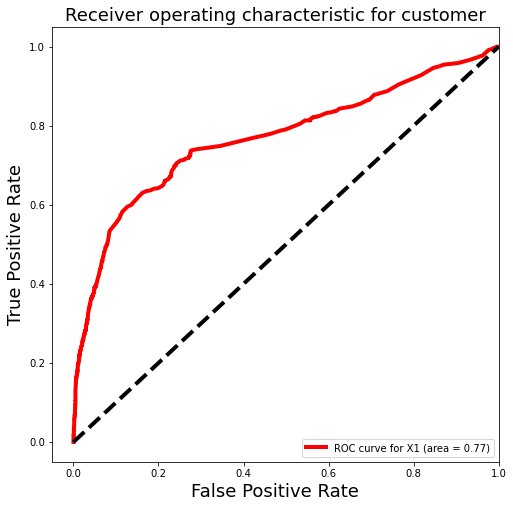

In [33]:
# X1
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve 
# Find fpr, tpr
preds1 = pred_test_probability_df.iloc[:,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test1, preds1)

# Find auc
roc_auc1 = metrics.auc(fpr1, tpr1)

# Plot of a ROC curve for class 1
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr1, tpr1, color='red', lw = 4, label = 'ROC curve for X1 (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [34]:
# Build Model with X2
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=100, random_state=1)

# Fit Model
model2.fit(X_train2, y_train2)

# Score
score2 = model2.score(X_train2, y_train2)
print("score of X2 : ", score2)

# intercept
print("model intercept : ", model2.intercept_[0])

# coeff
for col in zip(X_train2.columns, model2.coef_[0]):
    print('{:<30s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

score of X2 :  0.8997875569044006
model intercept :  0.0026094373933110136
pdays                           -0.001543
previous                        -0.029202
emp_var_rate                    -0.175346
cons_price_idx                  +0.265704
cons_conf_idx                   +0.035825
euribor3m                       -0.202669
campaign                        -0.014165
nr_employed                     -0.004564


In [35]:
# Confusion matrix for X2
import sklearn.metrics as metrics

# X1 features
y_pred_class2 = model2.predict(X_test2)

cfm2= metrics.confusion_matrix(y_test2, y_pred_class2)
#print(cfm2)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm2_df = pd.DataFrame(cfm2,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - LogReg\n", cfm2_df)

Confusion Matrix - LogReg
         predicted_No  predicted_Yes
is_No           7220             74
is_Yes           763            181


In [36]:
# Accuracy for X2

# Classification Accuracy
numerator = cfm2_df.iloc[1,1] + cfm2_df.iloc[0,0]     # TP + TN
denominator = cfm2_df.sum().sum()                     # sum of confusion matrix 
accuracy = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Accuracy for X2 : ", accuracy)

# Classification Error
numerator = cfm2_df.iloc[0,1] + cfm2_df.iloc[1,0]      # FP + FN
denominator = cfm2_df.sum().sum()                      # sum of confusion matrix
error = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Error for X2 : ", error)

# Sensitivity
numerator = cfm2_df.iloc[1,1]              # TP
denominator = cfm2_df.iloc[1,0] + cfm2_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Sensitivity for X2 : ", sensitivity)

# Specificity
numerator = cfm2_df.iloc[0,0]              # TN
denominator = cfm2_df.iloc[0,1] + cfm2_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity for X2 : ", specificity)

# False Positive Rate
numerator = cfm2_df.iloc[0,1]              # FP
denominator = cfm2_df.iloc[0,0] + cfm2_df.iloc[0,1]         # TN + FP
fpr = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("False Positive Rate for X2 : ", fpr)

# Precision
numerator = cfm2_df.iloc[1,1]              # TP
denominator = cfm2_df.iloc[1,1] + cfm2_df.iloc[0,1]         # TP + FP
precision = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Precision for X2 : ", precision)

Classification Accuracy for X2 :  0.8983976693372178
Classification Error for X2 :  0.10160233066278222
Sensitivity for X2 :  0.1917372881355932
Specificity for X2 :  0.9898546750754045
False Positive Rate for X2 :  0.010145324924595559
Precision for X2 :  0.7098039215686275


In [37]:
# X2
# Get the predicted probability vector and explicitly name the columns
predictions = model2.predict_proba(X_test2)
#print(predictions)
pred_test_probability_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])
#pred_test_probability_df

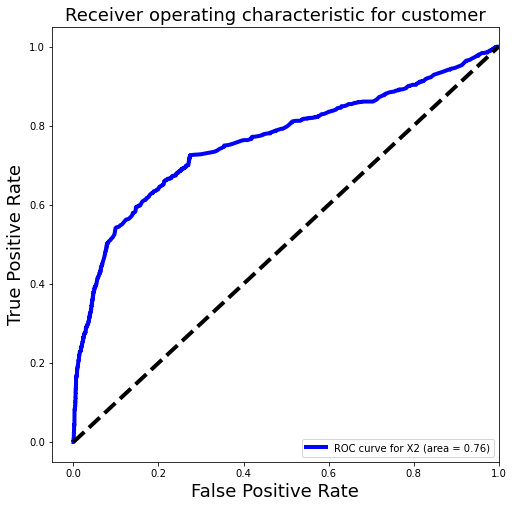

In [38]:
# X2
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
# Find fpr, tpr
preds2 = pred_test_probability_df.iloc[:,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test2, preds2)

# Find auc
roc_auc2 = metrics.auc(fpr2, tpr2)

# Plot of a ROC curve for class 1 
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr2, tpr2, color='blue', lw = 4, label = 'ROC curve for X2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Naive Bayes for X1

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
# Create the GaussianNB model
# X1
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=1)

gnb1 = GaussianNB()
gnb1.fit(X_train1, y_train1)


GaussianNB()

In [41]:
# Score
score_gnb1 = gnb1.score(X_train1, y_train1)
print("score of gnb imbalanced dataset : ", score_gnb1)


# Confusion matrix
import sklearn.metrics as metrics

y_pred_gnb1 = gnb1.predict(X_test1)

cfm_gnb1= metrics.confusion_matrix(y_test1, y_pred_gnb1)
#print(cfm_gnb1)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm_gnb1_df = pd.DataFrame(cfm_gnb1,index=['is_cancer', 'is_healthy'], columns=['predicted_cancer','predicted_healthy'])
print("\nConfusion Matrix - GNB imbalanced dataset\n", cfm_gnb1_df)

# Accuracy

# Classification Accuracy
numerator = cfm_gnb1_df.iloc[1,1] + cfm_gnb1_df.iloc[0,0]     # TP + TN
denominator = cfm_gnb1_df.sum().sum()                     # sum of confusion matrix 
accuracy = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Accuracy - GNB imbalanced dataset : ", accuracy)

# Classification Error
numerator = cfm_gnb1_df.iloc[0,1] + cfm_gnb1_df.iloc[1,0]      # FP + FN
denominator = cfm_gnb1_df.sum().sum()                      # sum of confusion matrix
error = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Error - GNB imbalanced dataset : ", error)

# Sensitivity
numerator = cfm_gnb1_df.iloc[1,1]              # TP
denominator = cfm_gnb1_df.iloc[1,0] + cfm_gnb1_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Sensitivity - GNB imbalanced dataset : ", sensitivity)

# Specificity
numerator = cfm_gnb1_df.iloc[0,0]              # TN
denominator = cfm_gnb1_df.iloc[0,1] + cfm_gnb1_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity - GNB imbalanced dataset : ", specificity)

# False Positive Rate
numerator = cfm_gnb1_df.iloc[0,1]              # FP
denominator = cfm_gnb1_df.iloc[0,0] + cfm_gnb1_df.iloc[0,1]         # TN + FP
fpr = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("False Positive Rate - GNB imbalanced dataset : ", fpr)

# Precision
numerator = cfm_gnb1_df.iloc[1,1]              # TP
denominator = cfm_gnb1_df.iloc[1,1] + cfm_gnb1_df.iloc[0,1]         # TP + FP
precision = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Precision - GNB imbalanced dataset : ", precision)


score of gnb imbalanced dataset :  0.8268285280728377

Confusion Matrix - GNB imbalanced dataset
             predicted_cancer  predicted_healthy
is_cancer               6367                927
is_healthy               467                477
Classification Accuracy - GNB imbalanced dataset :  0.8307841709152707
Classification Error - GNB imbalanced dataset :  0.1692158290847293
Sensitivity - GNB imbalanced dataset :  0.5052966101694916
Specificity - GNB imbalanced dataset :  0.8729092404716206
False Positive Rate - GNB imbalanced dataset :  0.12709075952837948
Precision - GNB imbalanced dataset :  0.33974358974358976


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred_gnb1))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7294
           1       0.34      0.51      0.41       944

    accuracy                           0.83      8238
   macro avg       0.64      0.69      0.65      8238
weighted avg       0.86      0.83      0.84      8238



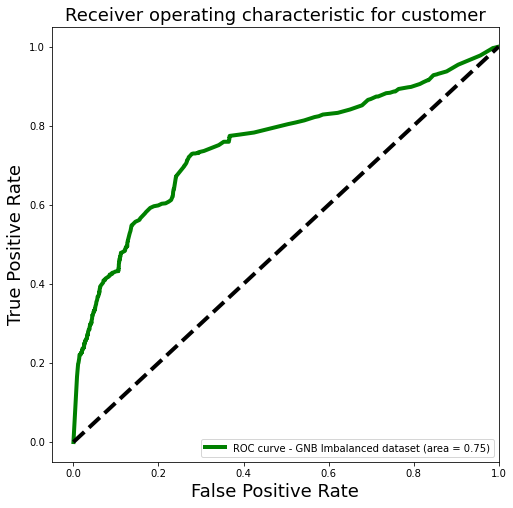

In [43]:
# Get the predicted probability vector and explicitly name the columns
predictions = gnb1.predict_proba(X_test1)

pred_test_probability_GNB1_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])
#pred_test_probability_GNB_df

from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
# Find fpr, tpr
preds_GNB1 = pred_test_probability_GNB1_df.iloc[:,1]
fpr_GNB1, tpr_GNB1, _ = metrics.roc_curve(y_test1, preds_GNB1)

# Find auc
roc_auc_GNB1 = metrics.auc(fpr_GNB1, tpr_GNB1)

# Plot of a ROC curve for class 1 (benign)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr_GNB1, tpr_GNB1, color='green', lw = 4, label = 'ROC curve - GNB Imbalanced dataset (area = %0.2f)' % roc_auc_GNB1)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Balanced Train Dataset 1

In [44]:
import imblearn

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X_train1, y_train1)



In [45]:
y_sm.value_counts()

1    29254
0    29254
Name: convert, dtype: int64

In [46]:
X_sm

,pdays,previous,emp_var_rate,cons_price_idx,euribor3m,nr_employed
0,999,0,-1.8,92.893,1.299000,5099.1
1,999,0,-1.8,93.369,0.635000,5008.7
2,999,0,1.4,93.918,4.963000,5228.1
3,999,1,-2.9,92.201,0.859000,5076.2
4,999,0,1.4,93.918,4.962000,5228.1
...,...,...,...,...,...,...
58503,999,0,-1.8,93.075,1.365000,5099.1
58504,999,0,-1.7,94.055,0.748936,4991.6
58505,3,1,-3.4,92.649,0.715000,5017.5
58506,999,0,1.4,93.444,4.962859,5228.1


## Logistic Regression with balanced dataset

In [47]:
# Build Model with balanced train dataset 1
from sklearn.linear_model import LogisticRegression
model1b = LogisticRegression(max_iter=100, random_state=1)

# Fit Model
model1b.fit(X_sm, y_sm)

# Score
score1b = model1b.score(X_sm, y_sm)
print("score of balanced train dataset : ", score1b)

# intercept
print("model intercept : ", model1b.intercept_[0])

# coeff
for col in zip(X_sm.columns, model1b.coef_[0]):
    print('{:<30s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

score of balanced train dataset :  0.716090107335749
model intercept :  0.0019537508170629457
pdays                           -0.001715
previous                        +0.012416
emp_var_rate                    -0.201109
cons_price_idx                  +0.141720
euribor3m                       -0.214253
nr_employed                     -0.002165


In [48]:
# Confusion matrix for balanced train dataset 1
import sklearn.metrics as metrics

# X1 features
y_pred_class1b = model1b.predict(X_test1)

cfm1b= metrics.confusion_matrix(y_test1, y_pred_class1b)
#print(cfm1)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm1b_df = pd.DataFrame(cfm1b,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - LogReg\n", cfm1b_df)

Confusion Matrix - LogReg
         predicted_No  predicted_Yes
is_No           5290           2004
is_Yes           260            684


In [49]:
# Accuracy for balanced train dataset1

# Classification Accuracy
numerator = cfm1b_df.iloc[1,1] + cfm1b_df.iloc[0,0]     # TP + TN
denominator = cfm1b_df.sum().sum()                     # sum of confusion matrix 
accuracy = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Accuracy for balanced train dataset 1 : ", accuracy)

# Classification Error
numerator = cfm1b_df.iloc[0,1] + cfm1b_df.iloc[1,0]      # FP + FN
denominator = cfm1b_df.sum().sum()                      # sum of confusion matrix
error = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Error for balanced train dataset 1 : ", error)

# Sensitivity
numerator = cfm1b_df.iloc[1,1]              # TP
denominator = cfm1b_df.iloc[1,0] + cfm1b_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Sensitivity for balanced train dataset 1 : ", sensitivity)

# Specificity
numerator = cfm1b_df.iloc[0,0]              # TN
denominator = cfm1b_df.iloc[0,1] + cfm1b_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity for balanced train dataset 1 : ", specificity)

# False Positive Rate
numerator = cfm1b_df.iloc[0,1]              # FP
denominator = cfm1b_df.iloc[0,0] + cfm1b_df.iloc[0,1]         # TN + FP
fpr = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("False Positive Rate for balanced train dataset 1 : ", fpr)

# Precision
numerator = cfm1b_df.iloc[1,1]              # TP
denominator = cfm1b_df.iloc[1,1] + cfm1b_df.iloc[0,1]         # TP + FP
precision = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Precision for balanced train dataset 1 : ", precision)

Classification Accuracy for balanced train dataset 1 :  0.7251760135955329
Classification Error for balanced train dataset 1 :  0.2748239864044671
Sensitivity for balanced train dataset 1 :  0.7245762711864406
Specificity for balanced train dataset 1 :  0.7252536331231149
False Positive Rate for balanced train dataset 1 :  0.2747463668768851
Precision for balanced train dataset 1 :  0.2544642857142857


In [50]:
# Balanced train dataset 1
# Get the predicted probability vector and explicitly name the columns
predictions = model1b.predict_proba(X_test1)
#print(predictions)
pred_test_probability_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])
#pred_test_probability_df

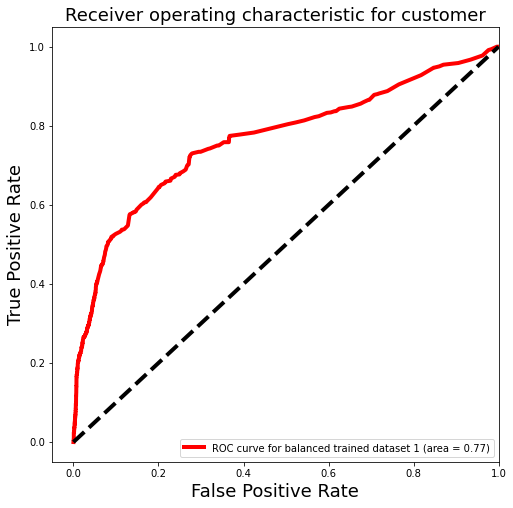

In [51]:
# Balanced train dataset 1
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve 
# Find fpr, tpr
preds1b = pred_test_probability_df.iloc[:,1]
fpr1b, tpr1b, _ = metrics.roc_curve(y_test1, preds1b)

# Find auc
roc_auc1b = metrics.auc(fpr1b, tpr1b)

# Plot of a ROC curve for class 1
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr1b, tpr1b, color='red', lw = 4, label = 'ROC curve for balanced trained dataset 1 (area = %0.2f)' % roc_auc1b)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [52]:
from imblearn.metrics import sensitivity_score, specificity_score


sensitivity = sensitivity_score(y_test1, y_pred_class1b, average='binary')
print('Sensitivity : ', sensitivity)

specificity = specificity_score(y_test1, y_pred_class1b, average='binary')
print('Specificity : ', specificity)




Sensitivity :  0.7245762711864406
Specificity :  0.7252536331231149


## Balanced train dataset 2 based on X2

In [53]:
# balanced train dataset 2 based on X2
smote = SMOTE(random_state=42)
X2_sm, y2_sm = smote.fit_sample(X_train2, y_train2)

In [54]:
# Build Model with balanced train dataset 2
from sklearn.linear_model import LogisticRegression
model2b = LogisticRegression(max_iter=1000, random_state=1)

# Fit Model
model2b.fit(X2_sm, y2_sm)

# Score
score2b = model2b.score(X2_sm, y2_sm)
print("score of balanced train dataset 2 : ", score2b)

# intercept
print("model intercept : ", model2b.intercept_[0])

# coeff
for col in zip(X2_sm.columns, model2b.coef_[0]):
    print('{:<30s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

score of balanced train dataset 2 :  0.7304129349832501
model intercept :  0.0030003965439649167
pdays                           -0.002204
previous                        -0.529498
emp_var_rate                    -0.263372
cons_price_idx                  +0.336037
cons_conf_idx                   +0.026845
euribor3m                       -0.108341
campaign                        -0.050387
nr_employed                     -0.005417


In [55]:
# Confusion matrix for balanced train dataset 2
import sklearn.metrics as metrics

# X2 features
y_pred_class2b = model2b.predict(X_test2)

cfm2b= metrics.confusion_matrix(y_test2, y_pred_class2b)
#print(cfm1)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm2b_df = pd.DataFrame(cfm2b,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - LogReg\n", cfm2b_df)

Confusion Matrix - LogReg
         predicted_No  predicted_Yes
is_No           5719           1575
is_Yes           305            639


In [56]:
# Accuracy for balanced train dataset 2

# Classification Accuracy
numerator = cfm2b_df.iloc[1,1] + cfm2b_df.iloc[0,0]     # TP + TN
denominator = cfm2b_df.sum().sum()                     # sum of confusion matrix 
accuracy = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Accuracy for balanced train dataset 2 : ", accuracy)

# Classification Error
numerator = cfm2b_df.iloc[0,1] + cfm2b_df.iloc[1,0]      # FP + FN
denominator = cfm2b_df.sum().sum()                      # sum of confusion matrix
error = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Error for balanced train dataset 2 : ", error)

# Sensitivity
numerator = cfm2b_df.iloc[1,1]              # TP
denominator = cfm2b_df.iloc[1,0] + cfm2b_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Sensitivity for balanced train dataset 2 : ", sensitivity)

# Specificity
numerator = cfm2b_df.iloc[0,0]              # TN
denominator = cfm2b_df.iloc[0,1] + cfm2b_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity for balanced train dataset 2 : ", specificity)

# False Positive Rate
numerator = cfm2b_df.iloc[0,1]              # FP
denominator = cfm2b_df.iloc[0,0] + cfm2b_df.iloc[0,1]         # TN + FP
fpr = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("False Positive Rate for balanced train dataset 2 : ", fpr)

# Precision
numerator = cfm2b_df.iloc[1,1]              # TP
denominator = cfm2b_df.iloc[1,1] + cfm2b_df.iloc[0,1]         # TP + FP
precision = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Precision for balanced train dataset 2 : ", precision)

Classification Accuracy for balanced train dataset 2 :  0.7717892692401068
Classification Error for balanced train dataset 2 :  0.22821073075989318
Sensitivity for balanced train dataset 2 :  0.676906779661017
Specificity for balanced train dataset 2 :  0.7840690978886756
False Positive Rate for balanced train dataset 2 :  0.21593090211132437
Precision for balanced train dataset 2 :  0.2886178861788618


In [57]:
# Balanced train dataset 2
# Get the predicted probability vector and explicitly name the columns
predictions = model2b.predict_proba(X_test2)
#print(predictions)
pred_test_probability_df = pd.DataFrame(predictions, columns=['class_0_pp', 'class_1_pp'])
#pred_test_probability_df

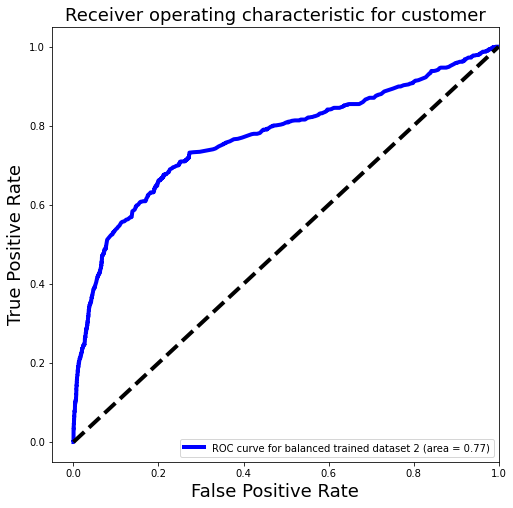

In [58]:
# Balanced train dataset 2
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve 
# Find fpr, tpr
preds2b = pred_test_probability_df.iloc[:,1]
fpr2b, tpr2b, _ = metrics.roc_curve(y_test2, preds2b)

# Find auc
roc_auc2b = metrics.auc(fpr2b, tpr2b)

# Plot of a ROC curve for class 1
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr2b, tpr2b, color='blue', lw = 4, label = 'ROC curve for balanced trained dataset 2 (area = %0.2f)' % roc_auc2b)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## GNB for balanced trained dataset 1

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
# Create the GaussianNB model

gnb1b = GaussianNB()
gnb1b.fit(X_sm, y_sm)


GaussianNB()

In [61]:
# Score
score_gnb1b = gnb1b.score(X_sm, y_sm)
print("score of X : ", score_gnb1b)


# Confusion matrix
import sklearn.metrics as metrics

y_pred_gnb1b = gnb1b.predict(X_test1)

cfm_gnb1b= metrics.confusion_matrix(y_test1, y_pred_gnb1b)
#print(cfm_gnb)
#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

cfm_gnb1b_df = pd.DataFrame(cfm_gnb1b,index=['is_cancer', 'is_healthy'], columns=['predicted_cancer','predicted_healthy'])
print("\nConfusion Matrix - GNB\n", cfm_gnb1b_df)
print('')

# Accuracy

# Classification Accuracy
numerator = cfm_gnb1b_df.iloc[1,1] + cfm_gnb1b_df.iloc[0,0]     # TP + TN
denominator = cfm_gnb1b_df.sum().sum()                     # sum of confusion matrix 
accuracy = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Accuracy - GNB : ", accuracy)

# Classification Error
numerator = cfm_gnb1b_df.iloc[0,1] + cfm_gnb1b_df.iloc[1,0]      # FP + FN
denominator = cfm_gnb1b_df.sum().sum()                      # sum of confusion matrix
error = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Classification Error - GNB : ", error)

# Sensitivity
numerator = cfm_gnb1b_df.iloc[1,1]              # TP
denominator = cfm_gnb1b_df.iloc[1,0] + cfm_gnb1b_df.iloc[1,1]         # TP + FN
sensitivity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Sensitivity - GNB : ", sensitivity)

# Specificity
numerator = cfm_gnb1b_df.iloc[0,0]              # TN
denominator = cfm_gnb1b_df.iloc[0,1] + cfm_gnb1b_df.iloc[0,0]         # TN + FP
specificity = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Specificity - GNB : ", specificity)

# False Positive Rate
numerator = cfm_gnb1b_df.iloc[0,1]              # FP
denominator = cfm_gnb1b_df.iloc[0,0] + cfm_gnb1b_df.iloc[0,1]         # TN + FP
fpr = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("False Positive Rate - GNB : ", fpr)

# Precision
numerator = cfm_gnb1b_df.iloc[1,1]              # TP
denominator = cfm_gnb1b_df.iloc[1,1] + cfm_gnb1b_df.iloc[0,1]         # TP + FP
precision = float(numerator)/float(denominator)
#print(numerator)
#print(denominator)
print("Precision - GNB : ", precision)


score of X :  0.716090107335749

Confusion Matrix - GNB
             predicted_cancer  predicted_healthy
is_cancer               5290               2004
is_healthy               260                684

Classification Accuracy - GNB :  0.7251760135955329
Classification Error - GNB :  0.2748239864044671
Sensitivity - GNB :  0.7245762711864406
Specificity - GNB :  0.7252536331231149
False Positive Rate - GNB :  0.2747463668768851
Precision - GNB :  0.2544642857142857


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred_gnb1b))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82      7294
           1       0.25      0.72      0.38       944

    accuracy                           0.73      8238
   macro avg       0.60      0.72      0.60      8238
weighted avg       0.87      0.73      0.77      8238



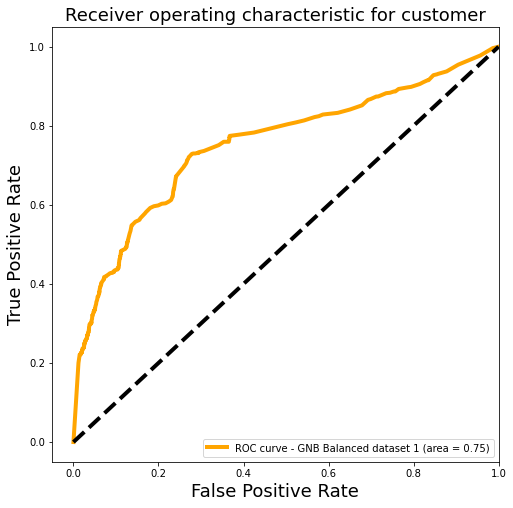

In [63]:
# Get the predicted probability vector and explicitly name the columns
predictions1b = gnb1b.predict_proba(X_test1)

pred_test_probability_GNB1b_df = pd.DataFrame(predictions1b, columns=['class_0_pp', 'class_1_pp'])
#pred_test_probability_GNB_df

from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve
# Find fpr, tpr
preds_GNB1b = pred_test_probability_GNB1b_df.iloc[:,1]
fpr_GNB1b, tpr_GNB1b, _ = metrics.roc_curve(y_test1, preds_GNB1b)

# Find auc
roc_auc_GNB1b = metrics.auc(fpr_GNB1b, tpr_GNB1b)

# Plot of a ROC curve for class 1 (benign)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr_GNB1b, tpr_GNB1b, color='orange', lw = 4, label = 'ROC curve - GNB Balanced dataset 1 (area = %0.2f)' % roc_auc_GNB1b)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for customer', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Plot the ROC curve for the Logistic Regressions and Naive Bayes for imbalanced dataset and balanced dataset on the same plot

<Figure size 576x576 with 0 Axes>

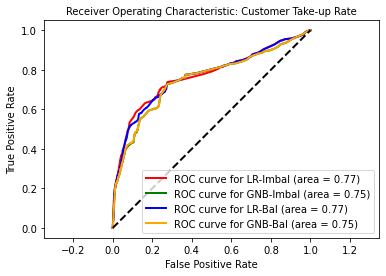

In [64]:
plt.figure(figsize=[8,8])

fig, ax = plt.subplots()

ax.plot(fpr1, tpr1, color='red', lw = 2, label = 'ROC curve for LR-Imbal (area = %0.2f)' % roc_auc1)
ax.plot(fpr_GNB1, tpr_GNB1, color='green', lw = 2, label = 'ROC curve for GNB-Imbal (area = %0.2f)' % roc_auc_GNB1)
ax.plot(fpr1b, tpr1b, color='blue', lw = 2, label = 'ROC curve for LR-Bal (area = %0.2f)' % roc_auc1b)
ax.plot(fpr_GNB1b, tpr_GNB1b, color='orange', lw = 2, label = 'ROC curve for GNB-Bal (area = %0.2f)' % roc_auc_GNB1b)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic: Customer Take-up Rate', fontsize=10)
ax.axis('equal')
leg = ax.legend(loc='lower right');
plt.show()

<Figure size 576x576 with 0 Axes>

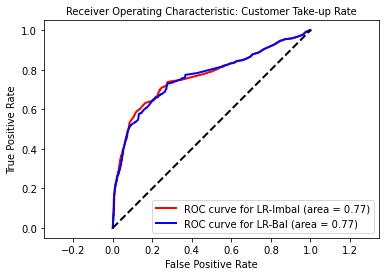

In [65]:
# ROC curves for LR Imbalanced and Balanced dataset
plt.figure(figsize=[8,8])

fig, ax = plt.subplots()

ax.plot(fpr1, tpr1, color='red', lw = 2, label = 'ROC curve for LR-Imbal (area = %0.2f)' % roc_auc1)
#ax.plot(fpr_GNB1, tpr_GNB1, color='green', lw = 2, label = 'ROC curve for GNB-Imbal (area = %0.2f)' % roc_auc_GNB1)
ax.plot(fpr1b, tpr1b, color='blue', lw = 2, label = 'ROC curve for LR-Bal (area = %0.2f)' % roc_auc1b)
#ax.plot(fpr_GNB, tpr_GNB, color='orange', lw = 2, label = 'ROC curve for GNB-Bal (area = %0.2f)' % roc_auc_GNB)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic: Customer Take-up Rate', fontsize=10)
ax.axis('equal')
leg = ax.legend(loc='lower right');
plt.show()

<Figure size 576x576 with 0 Axes>

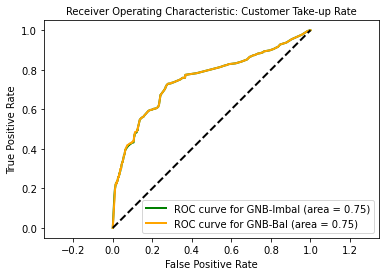

In [66]:
# ROC curves for GNB Imbalanced and Balanced dataset
plt.figure(figsize=[8,8])

fig, ax = plt.subplots()

#ax.plot(fpr1, tpr1, color='red', lw = 2, label = 'ROC curve for LR-Imbal (area = %0.2f)' % roc_auc1)
ax.plot(fpr_GNB1, tpr_GNB1, color='green', lw = 2, label = 'ROC curve for GNB-Imbal (area = %0.2f)' % roc_auc_GNB1)
#ax.plot(fpr1b, tpr1b, color='blue', lw = 2, label = 'ROC curve for LR-Bal (area = %0.2f)' % roc_auc1b)
ax.plot(fpr_GNB1b, tpr_GNB1b, color='orange', lw = 2, label = 'ROC curve for GNB-Bal (area = %0.2f)' % roc_auc_GNB1b)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic: Customer Take-up Rate', fontsize=10)
ax.axis('equal')
leg = ax.legend(loc='lower right');
plt.show()

<Figure size 576x576 with 0 Axes>

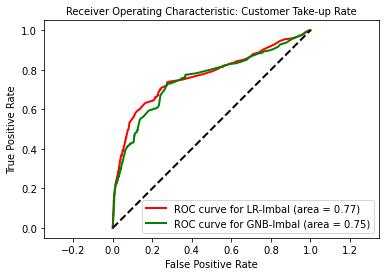

In [67]:
# ROC curves for LR and GNB Imbalanced dataset
plt.figure(figsize=[8,8])

fig, ax = plt.subplots()

ax.plot(fpr1, tpr1, color='red', lw = 2, label = 'ROC curve for LR-Imbal (area = %0.2f)' % roc_auc1)
ax.plot(fpr_GNB1, tpr_GNB1, color='green', lw = 2, label = 'ROC curve for GNB-Imbal (area = %0.2f)' % roc_auc_GNB1)
#ax.plot(fpr1b, tpr1b, color='blue', lw = 2, label = 'ROC curve for LR-Bal (area = %0.2f)' % roc_auc1b)
#ax.plot(fpr_GNB, tpr_GNB, color='orange', lw = 2, label = 'ROC curve for GNB-Bal (area = %0.2f)' % roc_auc_GNB)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic: Customer Take-up Rate', fontsize=10)
ax.axis('equal')
leg = ax.legend(loc='lower right');
plt.show()

<Figure size 576x576 with 0 Axes>

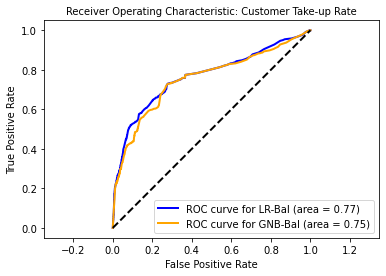

In [68]:
# ROC curves for LR and GNB balanced dataset
plt.figure(figsize=[8,8])

fig, ax = plt.subplots()

#ax.plot(fpr1, tpr1, color='red', lw = 2, label = 'ROC curve for LR-Imbal (area = %0.2f)' % roc_auc1)
#ax.plot(fpr_GNB1, tpr_GNB1, color='green', lw = 2, label = 'ROC curve for GNB-Imbal (area = %0.2f)' % roc_auc_GNB1)
ax.plot(fpr1b, tpr1b, color='blue', lw = 2, label = 'ROC curve for LR-Bal (area = %0.2f)' % roc_auc1b)
ax.plot(fpr_GNB1b, tpr_GNB1b, color='orange', lw = 2, label = 'ROC curve for GNB-Bal (area = %0.2f)' % roc_auc_GNB1b)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic: Customer Take-up Rate', fontsize=10)
ax.axis('equal')
leg = ax.legend(loc='lower right');
plt.show()

## Testings

In [69]:
# Test single sample

In [70]:
X_test1.iloc[1]

pdays              999.000
previous             0.000
emp_var_rate         1.400
cons_price_idx      93.918
euribor3m            4.963
nr_employed       5228.100
Name: 13950, dtype: float64

In [71]:
X_new = X_test1.iloc[50].copy()
X_new

pdays              999.000
previous             0.000
emp_var_rate         1.400
cons_price_idx      94.465
euribor3m            4.961
nr_employed       5228.100
Name: 9590, dtype: float64

In [72]:
X_new['emp_var_rate'] = -1.1
X_new['cons_price_idx'] = 94.767
X_new['euribor3m'] = 1.028
X_new['nr_employed'] = 4963.6
X_new

pdays              999.000
previous             0.000
emp_var_rate        -1.100
cons_price_idx      94.767
euribor3m            1.028
nr_employed       4963.600
Name: 9590, dtype: float64

In [73]:
X_new_array = np.array(X_new).reshape(1,-1)

In [74]:
y_pred_class1b = model1b.predict(X_new_array)
y_pred_class1b

array([1], dtype=int64)

In [75]:
# Test a small dataset

In [76]:
from pandas import ExcelFile 
custdf = pd.read_excel('custsets.xlsx', sheet_name = 'custset')
custdf

,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,1
1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
2,4,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
3,10,1,success,-1.8,92.893,-46.2,1.291,5099.1,1
4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,999,0,nonexistent,-0.2,92.756,-45.9,3.282,5176.3,0
6,14,4,failure,-1.1,94.601,-49.5,0.959,4963.6,0


In [77]:
custdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pdays           7 non-null      int64  
 1   previous        7 non-null      int64  
 2   poutcome        7 non-null      object 
 3   emp_var_rate    7 non-null      float64
 4   cons_price_idx  7 non-null      float64
 5   cons_conf_idx   7 non-null      float64
 6   euribor3m       7 non-null      float64
 7   nr_employed     7 non-null      float64
 8   y               7 non-null      int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 632.0+ bytes


In [78]:
X_cust = custdf[['pdays', 'previous', 'emp_var_rate', 'cons_price_idx','euribor3m', 'nr_employed']]
y_cust = custdf['y']


In [79]:
y_pred = model1b.predict(X_cust)
y_pred

array([0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [80]:
X_cust

,pdays,previous,emp_var_rate,cons_price_idx,euribor3m,nr_employed
0,999,0,1.1,93.994,4.855,5191.0
1,999,0,-1.8,93.075,1.405,5099.1
2,4,1,-2.9,92.963,1.266,5076.2
3,10,1,-1.8,92.893,1.291,5099.1
4,999,0,1.1,93.994,4.857,5191.0
5,999,0,-0.2,92.756,3.282,5176.3
6,14,4,-1.1,94.601,0.959,4963.6


In [81]:
y_cust

0    1
1    1
2    1
3    1
4    0
5    0
6    0
Name: y, dtype: int64

In [82]:
from imblearn.metrics import sensitivity_score, specificity_score


sensitivity = sensitivity_score(y_cust, y_pred, average='binary')
print('Sensitivity : ', sensitivity)

specificity = specificity_score(y_cust, y_pred, average='binary')
print('Specificity : ', specificity)

Sensitivity :  0.75
Specificity :  0.6666666666666666


In [83]:
# Confusion matrix for balanced train dataset 1
import sklearn.metrics as metrics

cfm = metrics.confusion_matrix(y_cust, y_pred)

#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
cfm_df = pd.DataFrame(cfm,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - LR Mktg Campaign\n", cfm_df)


Confusion Matrix - LR Mktg Campaign
         predicted_No  predicted_Yes
is_No              2              1
is_Yes             1              3


In [84]:
# 2nd cust dataset test - all 0 converts

In [85]:
from pandas import ExcelFile 
custdf = pd.read_excel('custsets.xlsx', sheet_name = 'newcust')
custdf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,41,admin.,married,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,56,technician,married,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,32,entrepreneur,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,46,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
5,42,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,1
6,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
7,54,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
8,31,admin.,single,university.degree,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228,0
9,33,technician,married,professional.course,no,unknown,unknown,cellular,aug,thu,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228,1


In [86]:
# Set X and Y
X_cust = custdf[['pdays', 'previous', 'emp_var_rate', 'cons_price_idx','euribor3m', 'nr_employed']]
y_cust = custdf['y']

# Prediction run
y_pred = model1b.predict(X_cust)
y_pred

# Confusion matrix of the results
import sklearn.metrics as metrics

cfm = metrics.confusion_matrix(y_cust, y_pred)

#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
cfm_df = pd.DataFrame(cfm,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - LR Mktg Campaign\n", cfm_df)


# Prediction scores
from imblearn.metrics import sensitivity_score, specificity_score

sensitivity = sensitivity_score(y_cust, y_pred, average='binary')
print('Sensitivity : ', sensitivity)

specificity = specificity_score(y_cust, y_pred, average='binary')
print('Specificity : ', specificity)


Confusion Matrix - LR Mktg Campaign
         predicted_No  predicted_Yes
is_No              9             18
is_Yes             3              8
Sensitivity :  0.7272727272727273
Specificity :  0.3333333333333333


In [87]:
# 3rd cust dataset test - all converts

from pandas import ExcelFile 
custdf = pd.read_excel('custsets.xlsx', sheet_name = 'newcust')
custdf

# Set X and Y
X_cust = custdf[['pdays', 'previous', 'emp_var_rate', 'cons_price_idx','euribor3m', 'nr_employed']]
y_cust = custdf['y']

# Prediction run
y_pred = model1b.predict(X_cust)
y_pred

# Confusion matrix of the results
import sklearn.metrics as metrics

cfm = metrics.confusion_matrix(y_cust, y_pred)

#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
cfm_df = pd.DataFrame(cfm,index=['is_No', 'is_Yes'], columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - LR Mktg Campaign\n", cfm_df)


# Prediction scores
from imblearn.metrics import sensitivity_score, specificity_score

sensitivity = sensitivity_score(y_cust, y_pred, average='binary')
print('Sensitivity : ', sensitivity)

specificity = specificity_score(y_cust, y_pred, average='binary')
print('Specificity : ', specificity)


Confusion Matrix - LR Mktg Campaign
         predicted_No  predicted_Yes
is_No              9             18
is_Yes             3              8
Sensitivity :  0.7272727272727273
Specificity :  0.3333333333333333


In [88]:
# cust dataset test - LR model

from pandas import ExcelFile 
custdf = pd.read_excel('custsets.xlsx', sheet_name = 'newcust')
custdf

# Set X and Y
X_cust = custdf[['pdays', 'previous', 'emp_var_rate', 
                 'cons_price_idx','euribor3m', 'nr_employed']]
y_cust = custdf['y']

# Prediction run
y_pred = model1b.predict(X_cust)
custdf['predictions'] = y_pred
custdf.to_excel('custpred.xlsx', sheet_name='results', index=False)

# Confusion matrix of the results
import sklearn.metrics as metrics

cfm = metrics.confusion_matrix(y_cust, y_pred)

#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
cfm_df = pd.DataFrame(cfm,index=['is_No', 'is_Yes'], 
                      columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - LR Mktg Campaign\n", cfm_df)


# Prediction scores
from imblearn.metrics import sensitivity_score, specificity_score

sensitivity = sensitivity_score(y_cust, y_pred, average='binary')
print('Sensitivity : ', sensitivity)

specificity = specificity_score(y_cust, y_pred, average='binary')
print('Specificity : ', specificity)


Confusion Matrix - LR Mktg Campaign
         predicted_No  predicted_Yes
is_No              9             18
is_Yes             3              8
Sensitivity :  0.7272727272727273
Specificity :  0.3333333333333333


In [89]:
# cust dataset test - GNB model

# Prediction run
y_pred_gnb = gnb1b.predict(X_cust)
y_pred_gnb

# Confusion matrix of the results
import sklearn.metrics as metrics

cfm_gnb = metrics.confusion_matrix(y_cust, y_pred_gnb)

#print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
cfm_gnb_df = pd.DataFrame(cfm_gnb,index=['is_No', 'is_Yes'], 
                          columns=['predicted_No','predicted_Yes'])
print("Confusion Matrix - GNB Mktg Campaign\n", cfm_gnb_df)


# Prediction scores
from imblearn.metrics import sensitivity_score, specificity_score

sensitivity = sensitivity_score(y_cust, y_pred_gnb, average='binary')
print('Sensitivity GNB : ', sensitivity)

specificity = specificity_score(y_cust, y_pred_gnb, average='binary')
print('Specificity GNB : ', specificity)


Confusion Matrix - GNB Mktg Campaign
         predicted_No  predicted_Yes
is_No              9             18
is_Yes             3              8
Sensitivity GNB :  0.7272727272727273
Specificity GNB :  0.3333333333333333
